# Desafios desta aula

- Tentar vincular dados do IBGE com os dados de imóveis.
- Tratar os outliers e comparar com os resultados.
- Agrupar por mais de uma categoria e realizar as análises.
- Organize o colab para deixar com cara de projeto.

In [1]:
import pandas as pd

ibge = 'https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv'
#separa por ;
dados_ibge = pd.read_csv(ibge, sep=";", encoding='UTF-8', decimal=',')
dados_ibge.sample(5)

,Cod_setor,Cod_Grandes Regi�es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
12873,355030867000265,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.07,1426.14,1180142.66,1538.54,1099823.55,901.58,1090577.97,1319.14,1044746.19,NaN
12048,355030863000200,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.35,1681.67,4980951.56,2141.92,5362365.27,1046.71,2925552.81,1705.58,3646550.19,NaN
4314,355030825000277,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,4.05,672.53,179947.24,700.89,167584.11,381.33,185068.57,650.79,140338.02,NaN
7096,355030837000124,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.27,1088.84,839229.30,1192.54,795140.70,673.60,596197.62,1030.51,544097.84,NaN
4202,355030825000165,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,4.20,807.44,285067.27,857.91,259429.43,542.53,303779.81,810.11,236611.00,NaN


### Formatando base de dados

In [2]:
dados_ibge.drop(['Cod_setor', 
                 'Cod_Grandes Regi�es',
                 'Nome_Grande_Regiao',
                 'Cod_UF',
                 'Nome_da_UF ',
                 'Nome_da_micro',
                 'Cod_meso',
                 'Nome_da_meso',
                 'Cod_micro', 
                 'Cod_RM',
                 'Nome_da_RM',
                 'Cod_municipio',
                 'Nome_do_municipio',
                 'Cod_distrito',
                 'Cod_subdistrito', 
                 'Cod_bairro', 
                 'Nome_do_bairro',
                 'Situacao_setor',
                 'Unnamed: 33'],axis=1, inplace=True)

In [3]:
#dados_ibge['Nome_Grande_Regiao'] = dados_ibge['Nome_Grande_Regiao'].str.replace('�', 'a')
dados_ibge.replace('�', 'A', regex=True, inplace=True)

In [4]:
dados_ibge.columns

Index(['Nome_do_distrito', 'Nome_do_subdistrito', 'Tipo_setor', 'V001', 'V002',
       'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010', 'V011',
       'V012'],
      dtype='object')

In [5]:
#Testando se existem variaiveis igual para tira-las
#dados_ibge['Nome_do_municipio'].unique()
#dados_ibge['Nome_da_RM'].unique()
#dados_ibge['Nome_da_meso'].unique()
#dados_ibge['Nome_Grande_Regiao'].unique()
#dados_ibge['Nome_do_bairro'].unique()
#dados_ibge['Situacao_setor'].unique() - nao servem para nossa analise

In [6]:
dados_ibge.sample(10)

,Nome_do_distrito,Nome_do_subdistrito,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
17017,VILA MARIANA,VILA MARIANA,0,230.0,563.0,2.45,1.72,3476.36,10546150.21,3771.52,10327332.76,2511.65,11020832.33,3145.49,11810169.02
17954,VILA SANIA,VILA SANIA,0,128.0,320.0,2.50,1.39,3450.39,8536028.37,4089.35,7494190.44,2923.01,8063589.85,3955.52,6821636.46
6296,IPIRANGA,IPIRANGA,0,336.0,869.0,2.59,1.84,2755.28,8239690.54,3214.49,8136475.97,1979.03,7340495.87,2806.56,8088743.49
11378,PERDIZES,PERDIZES,0,369.0,1091.0,2.96,1.43,8025.08,73949435.87,8608.30,74304183.18,4621.70,46404568.25,6420.84,52926193.09
3982,CIDADE LIDER,CIDADE LIDER,0,253.0,817.0,3.23,3.06,869.70,587350.68,1100.17,488952.31,742.32,653274.00,1081.89,584587.60
12249,PONTE RASA,PONTE RASA,0,148.0,466.0,3.15,1.80,1720.10,3751628.51,1792.78,3780048.19,1027.84,2509941.42,1503.63,2957968.01
4785,ERMELINO MATARAZZO,ERMELINO MATARAZZO,0,138.0,448.0,3.25,1.75,1282.41,1636913.44,1566.13,1553985.85,861.17,1188665.39,1315.30,1218299.81
12795,RIO PEQUENO,RIO PEQUENO,0,84.0,174.0,2.07,1.01,3248.45,7450948.18,3687.43,6830742.63,2924.47,7984598.40,3643.61,7322358.79
6577,ITAIM BIBI,ITAIM BIBI,0,267.0,593.0,2.22,1.46,6841.85,20722333.11,7336.45,18583195.89,4682.62,24787571.02,6040.68,23770524.47
7577,JABAQUARA,JABAQUARA,1,30.0,89.0,2.97,1.96,353.67,75120.57,482.27,38761.26,199.03,72239.89,477.67,39177.13


/home/keven/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Nome_do_distrito'>

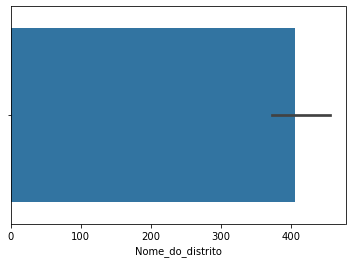

In [28]:
import seaborn as sns
df = dados_ibge['Nome_do_distrito'].value_counts()[:10]
sns.barplot(df, hue=dados_ibge['Nome_do_distrito'])